In [1]:
import sys
sys.path.append('../../')
sys.path.append('../../utilities')
import torch
import torchvision.transforms as transforms
from dataloader import VOC
from dataloader_sample import DataLoader
from utils import detection_collate_with_size
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
from utilities.augmentation import Augmenter
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
USE_AUGMENTAION = False
if(USE_AUGMENTAION):
    seq = iaa.SomeOf(2,[
            iaa.Multiply((1.2, 1.5)), # change brightness, doesn't affect BBs
            iaa.Affine(
                translate_px={"x": 3, "y": 10},
                scale=(0.9, 0.9)
            ), # translate by 40/60px on x/y axis, and scale to 50-70%, affects BBs
            iaa.AdditiveGaussianNoise(scale=0.1*255),
            iaa.CoarseDropout(0.02, size_percent=0.15, per_channel=0.5),
            iaa.Affine(rotate=45),
            iaa.Sharpen(alpha=0.5)
        ])
else:
     seq = iaa.Sequential([])

composed = transforms.Compose([Augmenter(seq)])

In [3]:
batch_size = 1
DATASET_PATH_MARTIN = "/media/keti-ai/AI_HARD3/DataSets/VOC_Pascal/VOC/VOCdevkit/VOC2012"
DATASET_PATH_JAEWON = "H:\VOC\VOC12\VOCdevkit_2\VOC2012"
SMALL_DATASET_PATH = "H:/person-300"

DATASET_PATH = SMALL_DATASET_PATH
CLASSES = "./../../person.names"
train_dataset = VOC(root = DATASET_PATH, CLASSES_PATH= CLASSES, transform=composed, cls_option = True, selective_cls="person")

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           collate_fn=detection_collate_with_size)
total_step = len(train_loader)
#print("TOTL DATASET LENGTH : {}".format(total_step))


VOC Parsing:   |████████████████████████████████████████| 100.0% (300/300)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (300/300)  Complete



In [4]:
iter_data = iter(train_loader)
image, lable, size = iter_data.next()

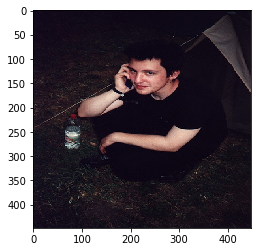

In [5]:
plt.imshow(np.transpose(image[0],(1,2,0)))

   # label tensor slice
    x_offset_label = target[:, :, :, 0]
    y_offset_label = target[:, :, :, 1]
    width_ratio_label = target[:, :, :, 2]
    height_ratio_label = target[:, :, :, 3]
    objness_label = target[:, :, :, 4]
    class_label = target[:, :, :, 5]

In [6]:
x = lable[0,:,:,0] * size[0][0] #x 38.2143 7.6429
y = lable[0,:,:,1] * size[0][1] #y 45.0924 0.1004
w = lable[0,:,:,2] * size[0][0] #w 381 0.7620
h = lable[0,:,:,3] * size[0][1] #h 422 0.9420

In [7]:
lable[0,:,:,5]

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
src = np.transpose(image[0],(1,2,0))

In [10]:
dst = cv2.resize(src.numpy(),(375,500))
dst = cv2.rectangle(dst,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(dst)

ValueError: only one element tensors can be converted to Python scalars